In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Load the mnist Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape((-1, 28, 28, 1))/255.0
x_test = x_test.reshape((-1, 28, 28, 1))/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32,(3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

C:\Users\Dm computers\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile and train the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8453 - loss: 0.5391 - val_accuracy: 0.9777 - val_loss: 0.0691
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9785 - loss: 0.0677 - val_accuracy: 0.9859 - val_loss: 0.0452
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9856 - loss: 0.0449 - val_accuracy: 0.9875 - val_loss: 0.0400
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9892 - loss: 0.0364 - val_accuracy: 0.9898 - val_loss: 0.0336
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 0.9884 - val_loss: 0.0359
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9932 - loss: 0.0222 - val_accuracy: 0.9892 - val_loss: 0.0358
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0.9902 - val_loss: 0.0314
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9953 - loss: 0.0153 - 

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss: .4f}")
print(f"Test Accuracy: {test_loss: .4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9878 - loss: 0.0402
Test Loss:  0.0320
Test Accuracy:  0.0320


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
random_indexes = np.random.choice(len(x_test), size = 5, replace = False)
images = x_test[random_index]
true_labels = np.argmax(x_test[random_index], axis = 1)

In [15]:
# Make predictons using the trained model
predictions = np.argmax(model.predict(images), axis =1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


C:\Users\Dm computers\AppData\Local\Temp\ipykernel_6332\2594137755.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

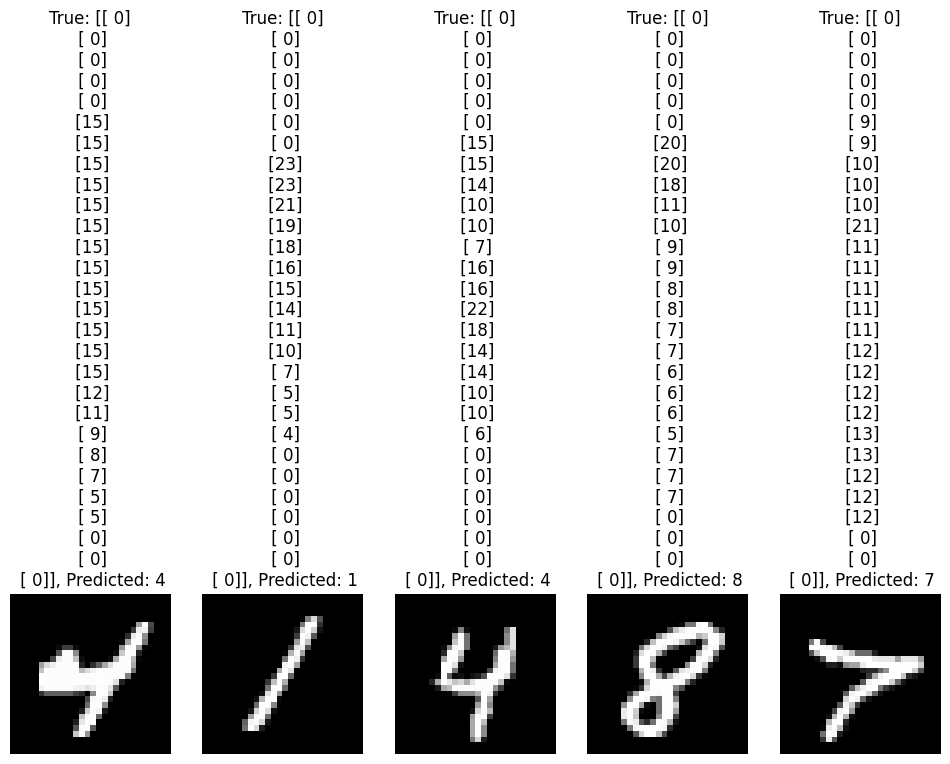

In [16]:
fig, axes = plt.subplots(1,5, figsize=(12,4))
for i, (image,true_label,predicted_label) in enumerate(zip(images, true_labels, predictions)):
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f'True: {true_label}, Predicted: {predicted_label}')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show